## Light Curves of Minor Planets
This code finds named minor planets from ZTF 
that have many detections in the light curve, then makes plots of each light curve.

In [10]:
import mysql.connector
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

This SQL query finds the name of the minor planet (ssnamenr) 
and the number of corresponding detections (candidates), ordered with the biggest light curves first.

In [11]:
import settings
msl = mysql.connector.connect(\
            user    =settings.DB_USER, \
            password=settings.DB_PASS, \
            host    =settings.DB_HOST, \
            database='ztf')
cursor = msl.cursor(buffered=True, dictionary=True)
query = 'SELECT ssnamenr, count(*) AS count FROM candidates '
query += 'GROUP BY ssnamenr ORDER BY count DESC LIMIT 200'
cursor.execute(query)
n = cursor.rowcount
print ('found %d minor planets' % n)

found 200 minor planets


For each of the light curves, split out the r and g filter detections (fid=0 and 1), and plot each one.

Object 3774 has 147 detections


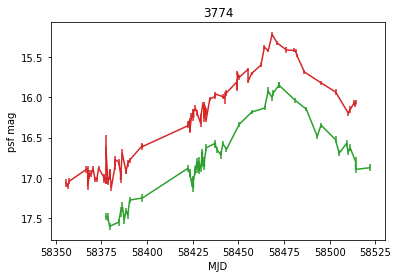

Object 4759 has 144 detections


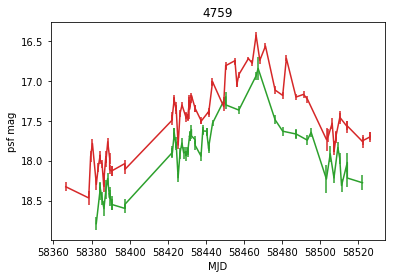

Object 21228 has 142 detections


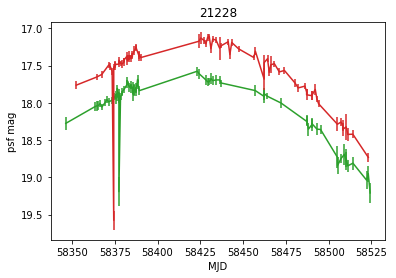

Object 41461 has 141 detections


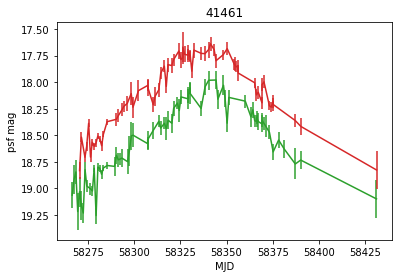

Object 32259 has 141 detections


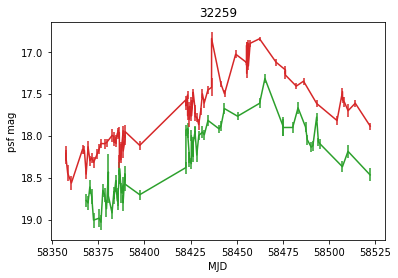

Object 6522 has 139 detections


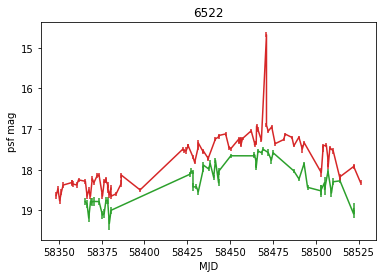

Object 49640 has 136 detections


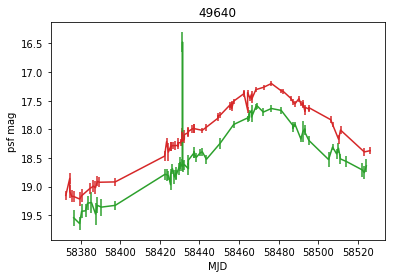

Object 8127 has 134 detections


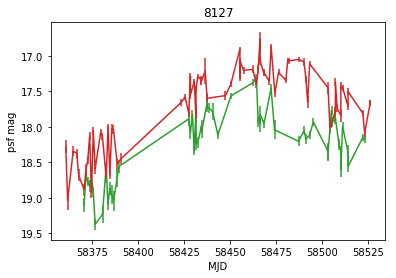

Object 115052 has 134 detections


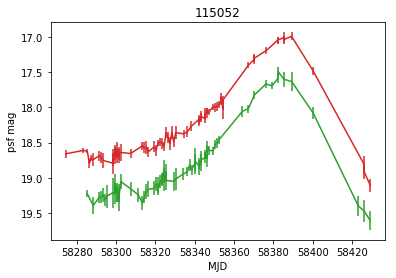

Object 2231 has 132 detections


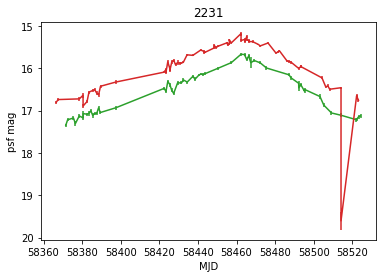

Object 55973 has 130 detections


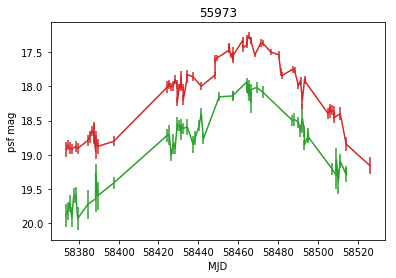

Object 3471 has 129 detections


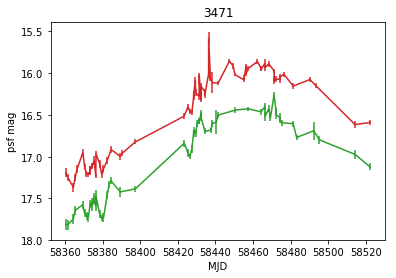

Object 7641 has 128 detections


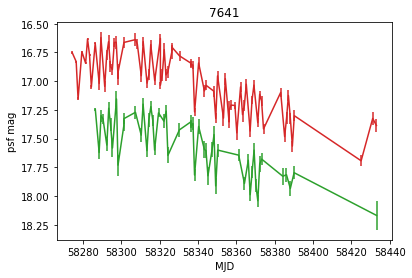

Object 10330 has 126 detections


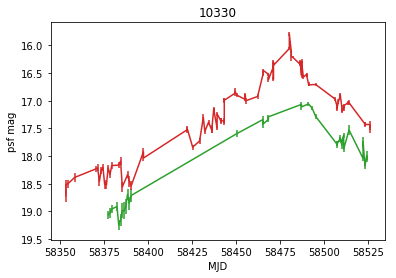

Object 2452 has 124 detections


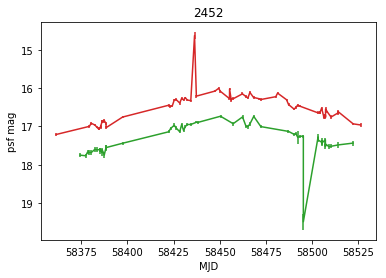

Object 54428 has 123 detections


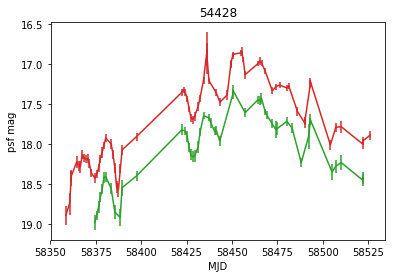

Object 23925 has 122 detections


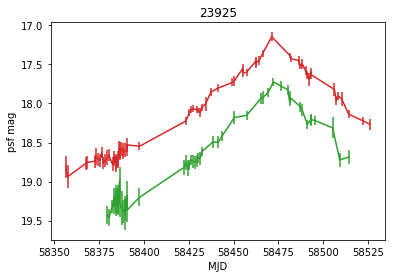

Object 8803 has 122 detections


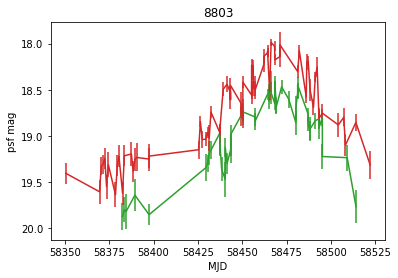

Object 52422 has 122 detections


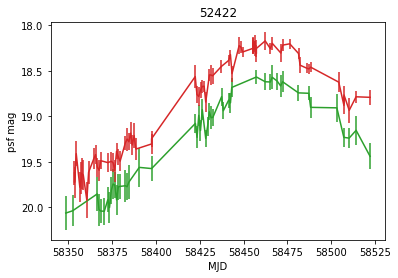

Object 109063 has 121 detections


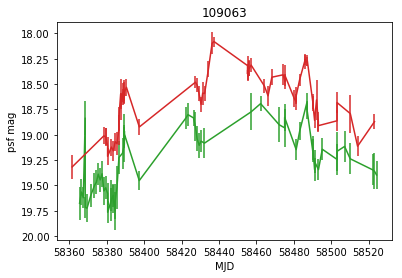

Object 227 has 121 detections


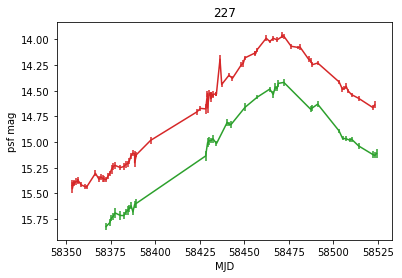

Object 6203 has 121 detections


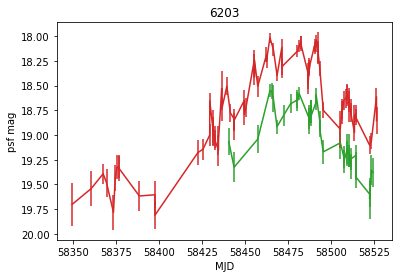

Object 2865 has 121 detections


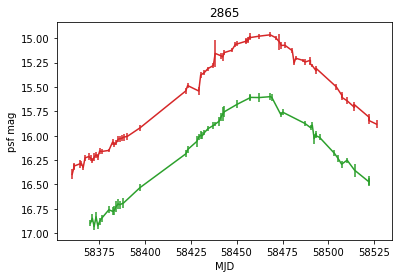

Object 22096 has 120 detections


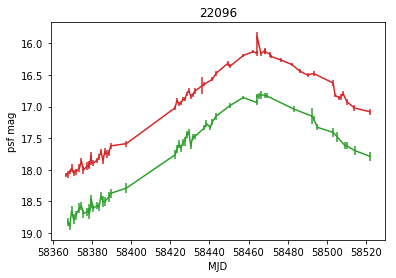

Object 48843 has 120 detections


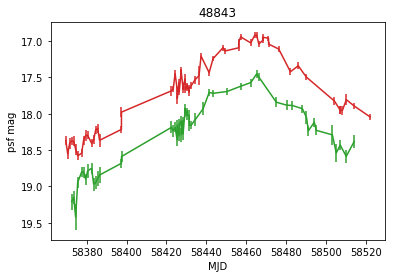

Object 3852 has 120 detections


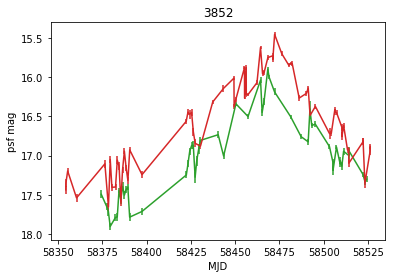

Object 1145 has 120 detections


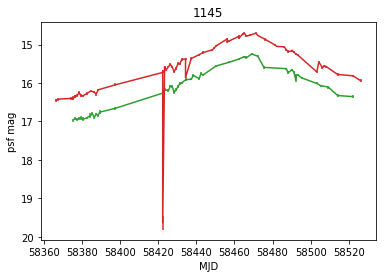

Object 839 has 119 detections


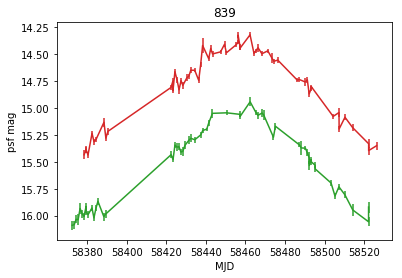

Object 105339 has 119 detections


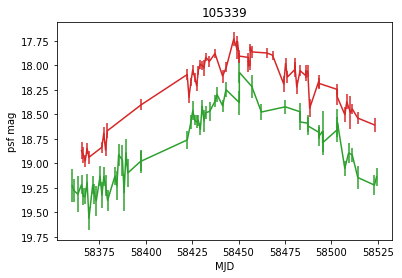

Object 52661 has 118 detections


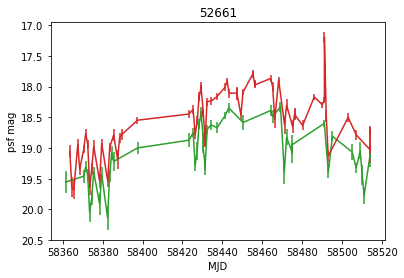

Object 2905 has 117 detections


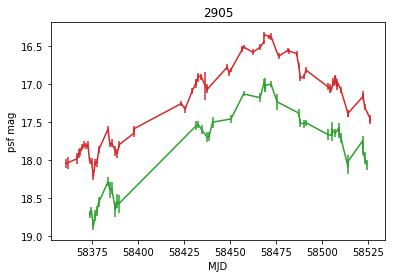

In [13]:
nplot = 0
cursor2 = msl.cursor(buffered=True, dictionary=True)
for row in cursor:
    count = row['count']
    name  = row['ssnamenr']
    if count > 200: continue  # fake values like 'null' and '-999' are very popular
    print('Object %s has %d detections' % (name, count))
    query = 'SELECT jd-2400000.5 AS mjd, magpsf, sigmapsf, fid FROM candidates WHERE ssnamenr = "%s"' % name
    cursor2.execute(query)
    magpsf   = [[],[]]
    mjd      = [[],[]]
    sigmapsf = [[],[]]
    for row2 in cursor2:
        fid = int(row2['fid'])-1
        mjd     [fid].append(row2['mjd'])
        magpsf  [fid].append(row2['magpsf'])
        sigmapsf[fid].append(row2['sigmapsf'])
    plt.errorbar(mjd[0], magpsf[0], yerr=sigmapsf[0], c="C2")
    plt.errorbar(mjd[1], magpsf[1], yerr=sigmapsf[1], c="C3")
    plt.xlabel("MJD")
    plt.ylabel("psf mag")
    plt.title("{}".format(name))
    plt.gca().invert_yaxis()
    plt.show()
    nplot += 1
    if nplot > 30: break